In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
#reflect an existing database into a new model

Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table

measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

In [10]:
one_year = dt.date(2017,8,23)-dt.timedelta(days=365)
one_year

datetime.date(2016, 8, 23)

In [11]:
date_str = one_year.strftime('%Y-%m-%d')
date_str

'2016-08-23'

/var/folders/21/spl45bvj2fg45pcvjs5jk5z40000gn/T/ipykernel_44556/2377937472.py:22: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.dates.AutoDateLocator'>
  plt.locator_params(axis='x', nbins=10)


<function matplotlib.pyplot.show(close=None, block=None)>

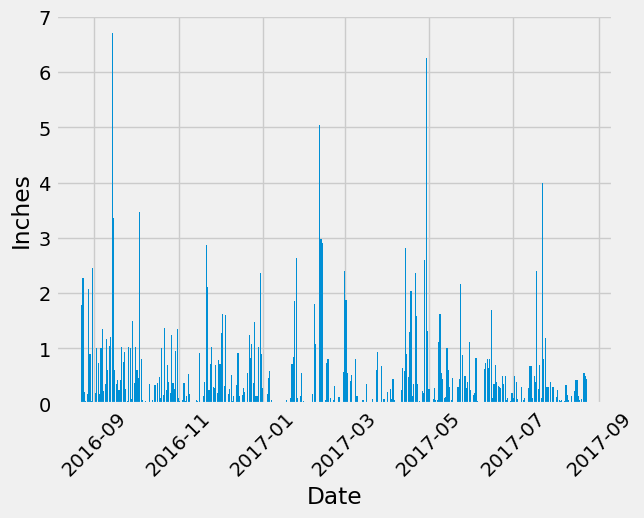

In [24]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
dt.date(2017,8,23)-dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
sel = [measurement.date, measurement.prcp]

year = session.query(*sel).filter(measurement.date <= '2017-08-23', measurement.date >= date_str)

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(year, columns=['Date', 'Precipitation'])

# Sort the dataframe by date
sorted_df = df.sort_values(['Date'])
## why do I need this line of code to clean the x axis of the bar graph?
sorted_df["Date"] = pd.to_datetime(sorted_df["Date"])

# Use Pandas Plotting with Matplotlib to plot the data
plt.bar(sorted_df["Date"],sorted_df["Precipitation"])
plt.locator_params(axis='x', nbins=10)
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Inches")
plt.show


In [13]:
sorted_df["Date"] = pd.to_datetime(sorted_df["Date"])
sorted_df

,Date,Precipitation
0,2016-08-23,0.00
1009,2016-08-23,NaN
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15
...,...,...
1527,2017-08-22,0.00
1008,2017-08-23,0.00
360,2017-08-23,0.00
1528,2017-08-23,0.08


In [14]:
# Use Pandas to calculate the summary statistics for the precipitation data


# Exploratory Station Analysis

In [15]:
# Design a query to calculate the total number of stations in the dataset


In [16]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.


In [17]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [18]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [19]:
# Close Session
session.close()